In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler,LabelEncoder,OneHotEncoder
import seaborn as sns 
from sklearn.impute import SimpleImputer 
from word2number import w2n
import seaborn as sns

In [ ]:
!pip install word2number

  Created wheel for word2number: filename=word2number-1.1-cp37-none-any.whl size=5584 sha256=d72210336034a3ed0adb4de2e0b844fa25ea5e73ea9b76d6fb0047ba9fc27aa6
  Stored in directory: /root/.cache/pip/wheels/46/2f/53/5f5c1d275492f2fce1cdab9a9bb12d49286dead829a4078e0e
Successfully built word2number


In [ ]:
df=pd.read_csv('Exercise-CarData.csv')
print(df)
#df = df.dropna(axis=0, subset=['FuelType'])
print("\n\nAfter transformation : \n", len(list(df['FuelType'])))

df['HP'] = df['HP'].replace('????', np.nan)
df['Doors'] =[w2n.word_to_num(w) for w in df['Doors']]
df = df.replace('??', np.nan)
X=df.iloc[:, 1:].values
print(X[6])



#replace Nan based on frequency of Fueltype
imp = SimpleImputer(strategy="most_frequent")
imp = imp.fit(X[:,3:4]) 
X[:,3:4]= imp.transform(X[:,3:4]) 


      Unnamed: 0  Price   Age     KM  ... Automatic    CC  Doors  Weight
0              0  13500  23.0  46986  ...         0  2000  three    1165
1              1  13750  23.0  72937  ...         0  2000      3    1165
2              2  13950  24.0  41711  ...         0  2000      3    1165
3              3  14950  26.0  48000  ...         0  2000      3    1165
4              4  13750  30.0  38500  ...         0  2000      3    1170
...          ...    ...   ...    ...  ...       ...   ...    ...     ...
1431        1431   7500   NaN  20544  ...         0  1300      3    1025
1432        1432  10845  72.0     ??  ...         0  1300      3    1015
1433        1433   8500   NaN  17016  ...         0  1300      3    1015
1434        1434   7250  70.0     ??  ...         0  1300      3    1015
1435        1435   6950  76.0      1  ...         0  1600      5    1114

[1436 rows x 11 columns]


After transformation : 
 1436
[16900 27.0 nan 'Diesel' nan nan 0 2000 3 1245]


In [ ]:
le = LabelEncoder()
X[ : ,3] = le.fit_transform(X[ : ,3])
print("\n\nInput : \n", X[ : ,3])



Input : 
 [1 1 1 ... 2 2 2]


In [ ]:
print('\nDesc:\n',df.describe())


Desc:
         Unnamed: 0         Price  ...        Doors      Weight
count  1436.000000   1436.000000  ...  1436.000000  1436.00000
mean    717.500000  10730.824513  ...     4.033426  1072.45961
std     414.681806   3626.964585  ...     0.952677    52.64112
min       0.000000   4350.000000  ...     2.000000  1000.00000
25%     358.750000   8450.000000  ...     3.000000  1040.00000
50%     717.500000   9900.000000  ...     4.000000  1070.00000
75%    1076.250000  11950.000000  ...     5.000000  1085.00000
max    1435.000000  32500.000000  ...     5.000000  1615.00000

[8 rows x 8 columns]


In [ ]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
print("\n\nScaled X : \n", X_scaled)



Scaled X : 
 [[0.3250444  0.27848101 0.19335471 ... 1.         0.33333333 0.26829268]
 [0.3339254  0.27848101 0.30014938 ... 1.         0.33333333 0.26829268]
 [0.3410302  0.29113924 0.1716468  ... 1.         0.33333333 0.26829268]
 ...
 [0.14742451        nan 0.07002086 ... 0.         0.33333333 0.02439024]
 [0.10301954 0.87341772        nan ... 0.         0.33333333 0.02439024]
 [0.09236234 0.94936709 0.         ... 0.42857143 1.         0.18536585]]


In [ ]:
std = StandardScaler()
X_std = std.fit_transform(X)
print("\n\nStandardized X : \n", X_std)



Standardized X : 
 [[ 0.76376268 -1.75818903 -0.58042086 ...  2.31497633 -1.08513865
   1.75856113]
 [ 0.83271485 -1.75818903  0.11494569 ...  2.31497633 -1.08513865
   1.75856113]
 [ 0.88787659 -1.70437596 -0.72176642 ...  2.31497633 -1.08513865
   1.75856113]
 ...
 [-0.6152808          nan -1.383478   ... -1.42599356 -1.08513865
  -1.09191497]
 [-0.96004167  0.7710253          nan ... -1.42599356 -1.08513865
  -1.09191497]
 [-1.04278428  1.09390373 -1.83940116 ...  0.17727925  1.014941
   0.78939926]]


In [ ]:
dummy = pd.get_dummies(df['FuelType'])
print("\n\nDummy :\n",dummy)
df = df.drop(['FuelType'],axis=1)
df = pd.concat([dummy,df],axis=1)
print("\n\nFinal Data :\n",df)



Dummy :
       CNG  Diesel  Petrol
0       0       1       0
1       0       1       0
2       0       1       0
3       0       1       0
4       0       1       0
...   ...     ...     ...
1431    0       0       1
1432    0       0       1
1433    0       0       1
1434    0       0       0
1435    0       0       1

[1436 rows x 3 columns]


Final Data :
       CNG  Diesel  Petrol  Unnamed: 0  ...  Automatic    CC Doors Weight
0       0       1       0           0  ...          0  2000     3   1165
1       0       1       0           1  ...          0  2000     3   1165
2       0       1       0           2  ...          0  2000     3   1165
3       0       1       0           3  ...          0  2000     3   1165
4       0       1       0           4  ...          0  2000     3   1170
...   ...     ...     ...         ...  ...        ...   ...   ...    ...
1431    0       0       1        1431  ...          0  1300     3   1025
1432    0       0       1        1432  ...          

In [ ]:
new_x=df.iloc[:, 1:].values
imputer = SimpleImputer(missing_values = np.nan,strategy = "mean")
imputer = imputer.fit(new_x[:,0:3]) 
new_x[:,0:3]= imputer.transform(new_x[:,0:3]) 
imp = SimpleImputer(strategy="most_frequent")
imp = imp.fit(new_x[:,4:]) 
new_x[:,4:]= imp.transform(new_x[:,4:]) 
print(new_x[6])

[1.0 0.0 6.0 16900 27.0 '1' '110' 1.0 0 2000 3 1245]


In [ ]:
df.head()

,CNG,Diesel,Petrol,Unnamed: 0,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight
0,0,1,0,0,13500,23.0,46986,90,1.0,0,2000,3,1165
1,0,1,0,1,13750,23.0,72937,90,1.0,0,2000,3,1165
2,0,1,0,2,13950,24.0,41711,90,NaN,0,2000,3,1165
3,0,1,0,3,14950,26.0,48000,90,0.0,0,2000,3,1165
4,0,1,0,4,13750,30.0,38500,90,0.0,0,2000,3,1170


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CNG         1436 non-null   uint8  
 1   Diesel      1436 non-null   uint8  
 2   Petrol      1436 non-null   uint8  
 3   Unnamed: 0  1436 non-null   int64  
 4   Price       1436 non-null   int64  
 5   Age         1336 non-null   float64
 6   KM          1421 non-null   object 
 7   HP          1430 non-null   object 
 8   MetColor    1286 non-null   float64
 9   Automatic   1436 non-null   int64  
 10  CC          1436 non-null   int64  
 11  Doors       1436 non-null   int64  
 12  Weight      1436 non-null   int64  
dtypes: float64(2), int64(6), object(2), uint8(3)
memory usage: 116.5+ KB


In [ ]:
corr = df.corr()
corr.head()

,CNG,Diesel,Petrol,Unnamed: 0,Price,Age,MetColor,Automatic,CC,Doors,Weight
CNG,1.000000,-0.034300,-0.219022,-0.043811,-0.032498,0.006958,0.003743,-0.024955,0.018141,0.017971,0.051688
Diesel,-0.034300,1.000000,-0.711686,-0.139813,0.014590,-0.070515,-0.015137,-0.081090,0.730292,0.010192,0.516471
Petrol,-0.219022,-0.711686,1.000000,0.124362,-0.024046,0.064011,-0.006363,0.058664,-0.561913,-0.008259,-0.425511
Unnamed: 0,-0.043811,-0.139813,0.124362,1.000000,-0.738289,0.907090,-0.078616,0.066299,-0.184490,-0.130268,-0.414577
Price,-0.032498,0.014590,-0.024046,-0.738289,1.000000,-0.878407,0.112041,0.033081,0.165067,0.185326,0.581198


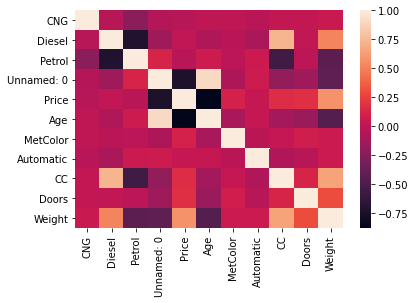

In [ ]:
sns.heatmap(corr)